In [ ]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

In [ ]:
train = pd.read_csv('/content/student_sleep_patterns.csv')

In [ ]:
train.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


**Student_ID:** Unique identifier for each student (integer).

**Age**: Age of the student in years (integer).

**Gender:** Gender of the student (categorical: 'Male', 'Female', 'Other').

**University_Year:** The student's current year of university (categorical: '1st Year', '2nd Year', '3rd Year', '4th Year').

**Sleep_Duration:** Total hours of sleep per night (float).

**Study_Hours:** Average number of hours spent studying per day (float).

**Screen_Time:** Average number of hours spent on screens (excluding studying) per day (float).

**Caffeine_Intake:** Average number of caffeinated beverages consumed per day (integer).

**Physical_Activity:** Average minutes spent on physical activity per day (integer).

**Sleep_Quality:** Subjective rating of sleep quality on a scale of 1 to 10 (1 being the worst, 10 being the best) (integer).

**Weekday_Sleep_Start:** Time the student typically goes to sleep on weekdays (float, in 24-hour format, e.g., 23.00 is 11 PM).

**Weekend_Sleep_Start:** Time the student typically goes to sleep on weekends (float, in 24-hour format).

**Weekday_Sleep_End:** Time the student typically wakes up on weekdays (float, in 24-hour format).

**Weekend_Sleep_End:** Time the student typically wakes up on weekends (float, in 24-hour format).

In [ ]:
train.describe()

,Student_ID,Age,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,21.53600,6.472400,5.981600,2.525000,2.462000,62.342000,5.362000,11.166860,12.375860,6.929900,8.988100
std,144.481833,2.33315,1.485764,3.475725,0.859414,1.682325,35.191674,2.967249,5.972352,5.789611,1.183174,1.111253
min,1.000000,18.00000,4.000000,0.100000,1.000000,0.000000,0.000000,1.000000,1.080000,2.050000,5.000000,7.020000
25%,125.750000,20.00000,5.100000,2.900000,1.800000,1.000000,32.750000,3.000000,6.087500,7.297500,5.900000,8.047500
50%,250.500000,21.00000,6.500000,6.050000,2.600000,2.000000,62.500000,5.000000,10.635000,12.690000,6.885000,9.005000
75%,375.250000,24.00000,7.800000,8.800000,3.300000,4.000000,93.250000,8.000000,16.152500,17.327500,7.972500,9.925000
max,500.000000,25.00000,9.000000,12.000000,4.000000,5.000000,120.000000,10.000000,21.930000,22.000000,8.980000,10.990000


In [ ]:
train.describe(include=['O'])

,Gender,University_Year
count,500,500
unique,3,4
top,Male,3rd Year
freq,186,132


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB


In [ ]:
train.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
University_Year,0
Sleep_Duration,0
Study_Hours,0
Screen_Time,0
Caffeine_Intake,0
Physical_Activity,0
Sleep_Quality,0


In [ ]:
train['Sleep_Quality_Category'] = pd.cut(train['Sleep_Quality'], bins=[0, 3, 7, 10], labels=['Low', 'Medium', 'High'])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train[['Gender', 'University_Year']] = enc.fit_transform(train[['Gender', 'University_Year']])
train.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End,Sleep_Quality_Category
0,1,24,2.0,1.0,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06,High
1,2,21,1.0,0.0,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21,Low
2,3,22,1.0,3.0,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92,Medium
3,4,24,2.0,3.0,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42,High
4,5,20,1.0,3.0,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01,Low


In [ ]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler

scaler_mm = MinMaxScaler()

train[['Physical_Activity']] = scaler_mm.fit_transform(train[['Physical_Activity']])
train.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End,Sleep_Quality_Category
0,1,24,2.0,1.0,7.7,7.9,3.4,2,0.308333,10,14.16,4.05,7.41,7.06,High
1,2,21,1.0,0.0,6.3,6.0,1.9,5,0.616667,2,8.73,7.10,8.21,10.21,Low
2,3,22,1.0,3.0,5.1,6.7,3.9,5,0.441667,5,20.00,20.47,6.88,10.92,Medium
3,4,24,2.0,3.0,6.3,8.6,2.8,4,0.458333,9,19.82,4.08,6.69,9.42,High
4,5,20,1.0,3.0,4.7,2.7,2.7,0,0.708333,3,20.98,6.12,8.98,9.01,Low


In [ ]:
# Функция для извлечения времени в минутах из формата float (часы.минуты)
def time_to_minutes(time):
    hours = int(time)  # Целая часть — это часы
    minutes = (time - hours) * 60  # Дробная часть — это минуты
    return hours * 60 + minutes  # Возвращаем количество минут

# Функция для вычисления продолжительности сна с учетом перехода через полночь
def calculate_sleep_duration(start_time, end_time):
    start_minutes = time_to_minutes(start_time)
    end_minutes = time_to_minutes(end_time)

    # Если время окончания сна меньше времени начала, значит, время окончания на следующий день
    if end_minutes < start_minutes:
        end_minutes += 24 * 60  # Добавляем 24 часа (1440 минут)

    return end_minutes - start_minutes

# Применяем функцию для вычисления продолжительности сна на буднях и выходных
train['Weekday_Sleep_Duration'] = train.apply(
    lambda row: calculate_sleep_duration(row['Weekday_Sleep_Start'], row['Weekday_Sleep_End']), axis=1
)

train['Weekend_Sleep_Duration'] = train.apply(
    lambda row: calculate_sleep_duration(row['Weekend_Sleep_Start'], row['Weekend_Sleep_End']), axis=1
)

# Преобразуем продолжительность сна в часы
train['Weekday_Sleep_Duration'] = train['Weekday_Sleep_Duration'] / 60
train['Weekend_Sleep_Duration'] = train['Weekend_Sleep_Duration'] / 60

train = train.drop(columns=['Weekday_Sleep_Start', 'Weekend_Sleep_Start', 'Weekday_Sleep_End', 'Weekend_Sleep_End'],axis=1)

train.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Sleep_Quality_Category,Weekday_Sleep_Duration,Weekend_Sleep_Duration
0,1,24,2.0,1.0,7.7,7.9,3.4,2,0.308333,10,High,17.25,3.01
1,2,21,1.0,0.0,6.3,6.0,1.9,5,0.616667,2,Low,23.48,3.11
2,3,22,1.0,3.0,5.1,6.7,3.9,5,0.441667,5,Medium,10.88,14.45
3,4,24,2.0,3.0,6.3,8.6,2.8,4,0.458333,9,High,10.87,5.34
4,5,20,1.0,3.0,4.7,2.7,2.7,0,0.708333,3,Low,12.00,2.89


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Student_ID              500 non-null    int64   
 1   Age                     500 non-null    int64   
 2   Gender                  500 non-null    float64 
 3   University_Year         500 non-null    float64 
 4   Sleep_Duration          500 non-null    float64 
 5   Study_Hours             500 non-null    float64 
 6   Screen_Time             500 non-null    float64 
 7   Caffeine_Intake         500 non-null    int64   
 8   Physical_Activity       500 non-null    float64 
 9   Sleep_Quality           500 non-null    int64   
 10  Sleep_Quality_Category  500 non-null    category
 11  Weekday_Sleep_Duration  500 non-null    float64 
 12  Weekend_Sleep_Duration  500 non-null    float64 
dtypes: category(1), float64(8), int64(4)
memory usage: 47.6 KB


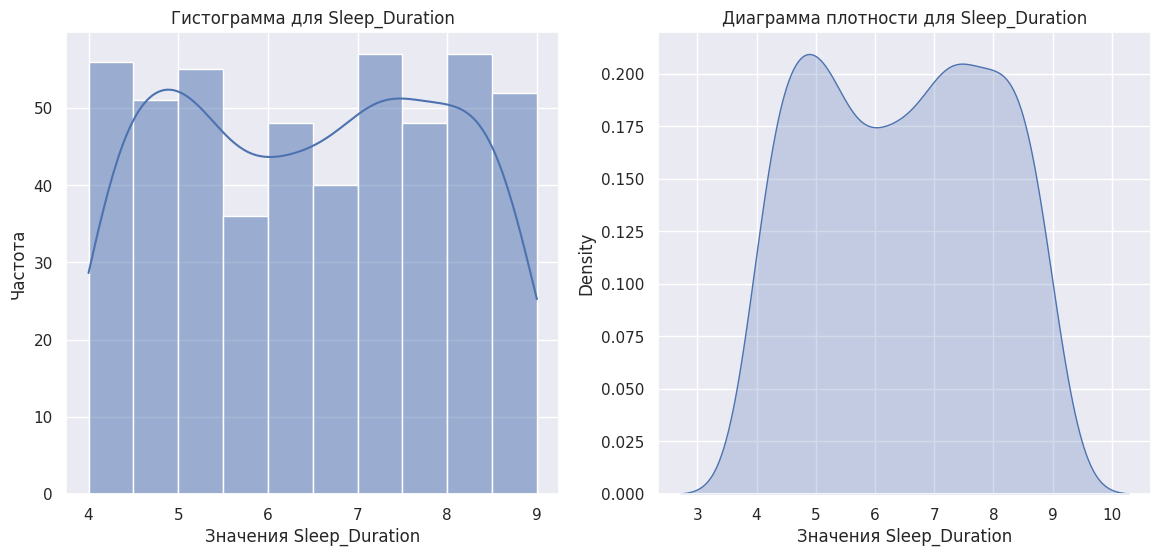

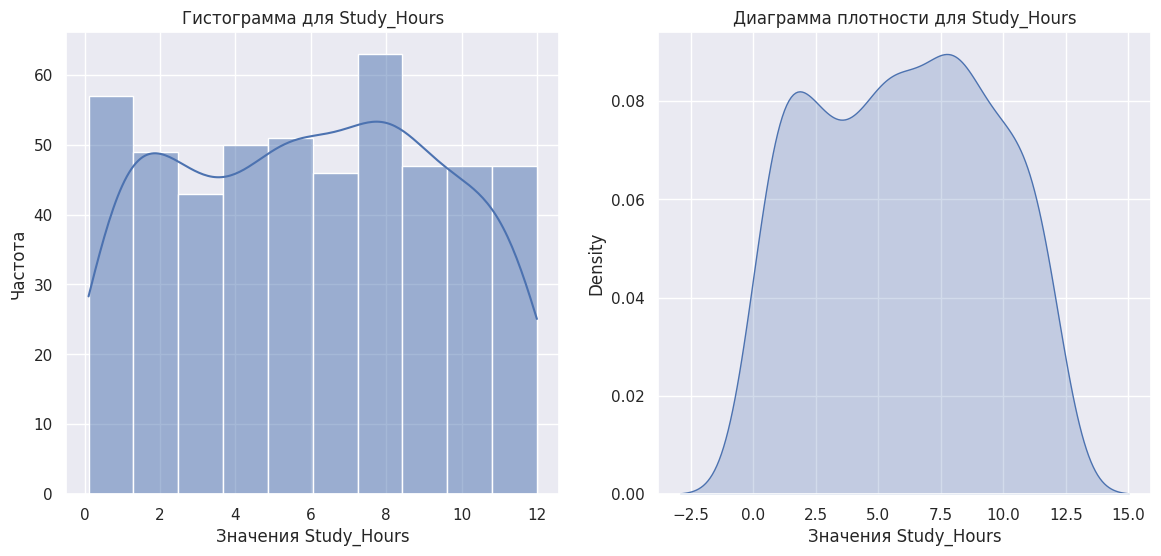

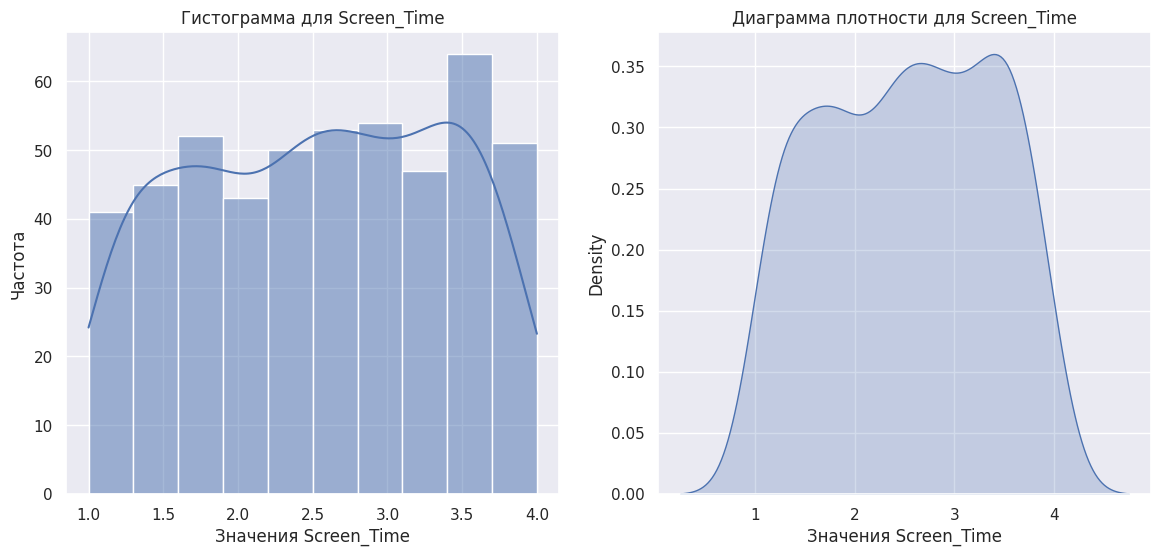

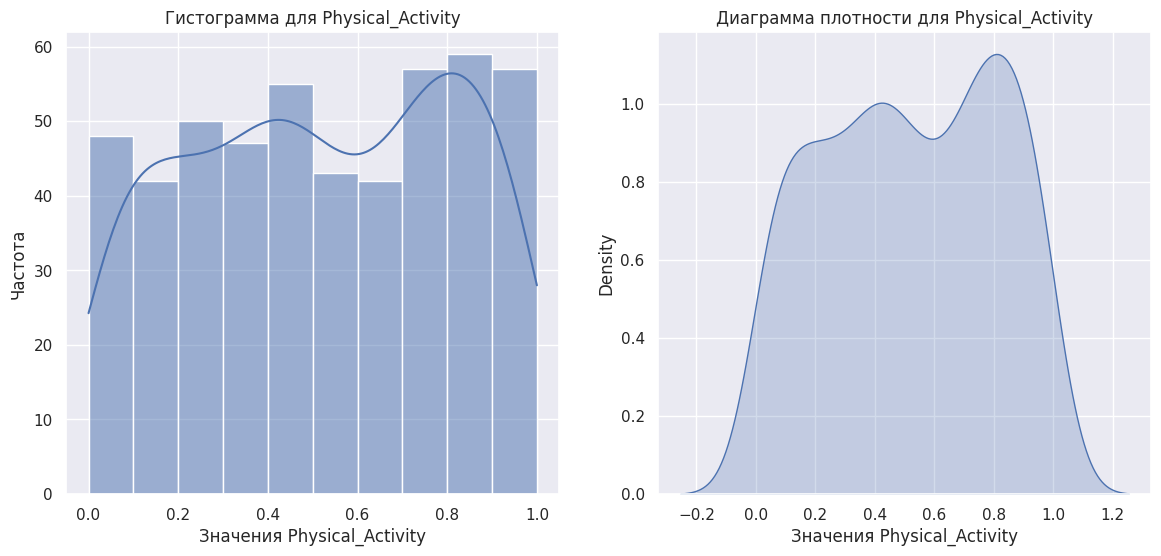

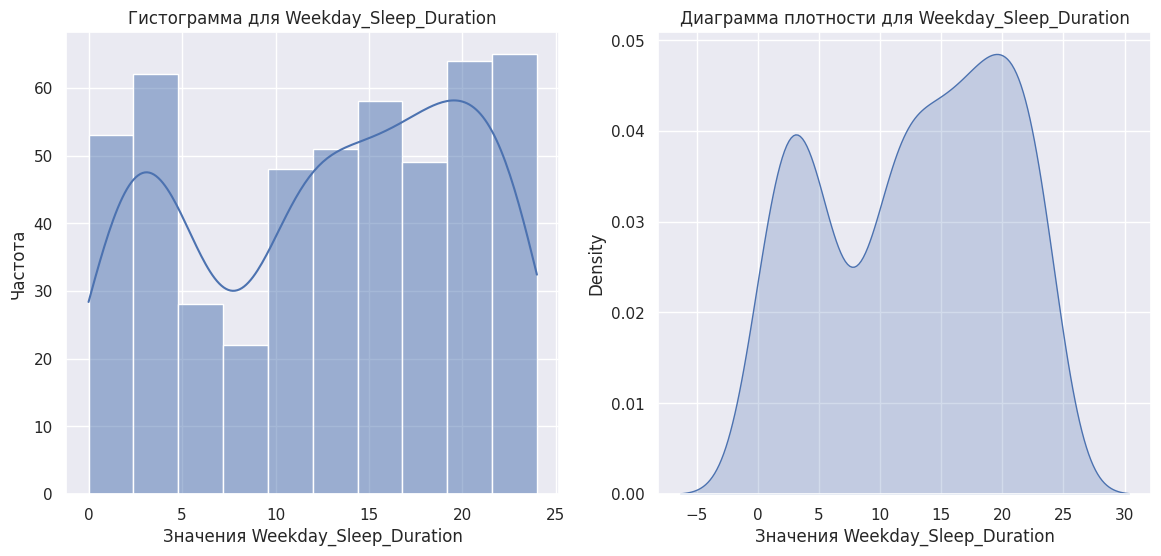

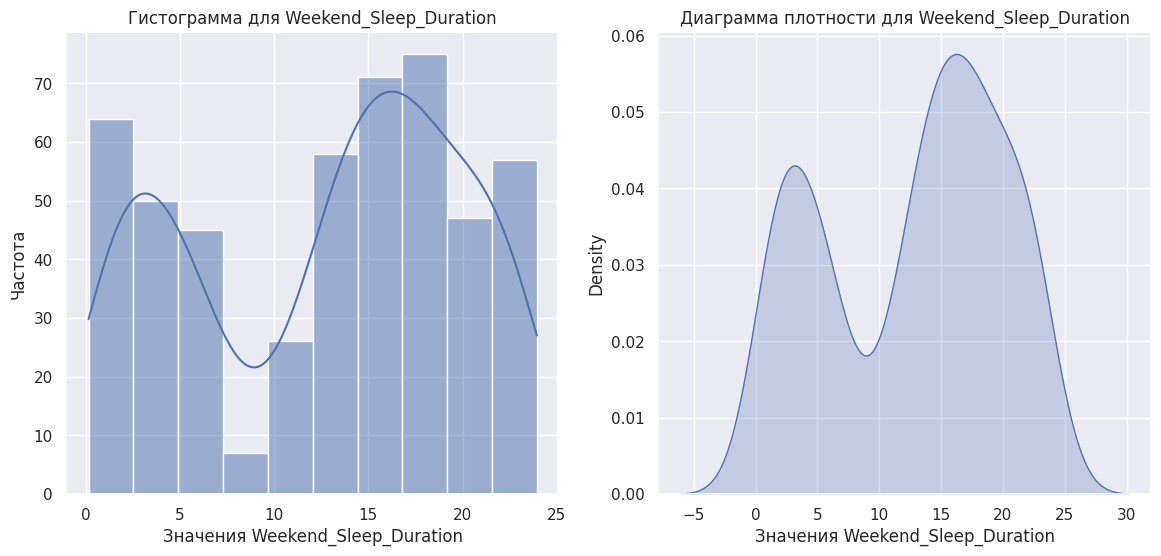

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


for feature in train.drop(columns=['Student_ID','Sleep_Quality_Category','Gender','University_Year','Caffeine_Intake','Sleep_Quality','Age']):
    plt.figure(figsize=(14, 6))


    plt.subplot(1, 2, 1)
    sns.histplot(train[feature],kde=True)
    plt.title(f'Гистограмма для {feature}')
    plt.xlabel(f'Значения {feature}')
    plt.ylabel('Частота')


    plt.subplot(1, 2, 2)
    sns.kdeplot(train[feature], fill=True)
    plt.title(f'Диаграмма плотности для {feature}')
    plt.xlabel(f'Значения {feature}')

    plt.show()


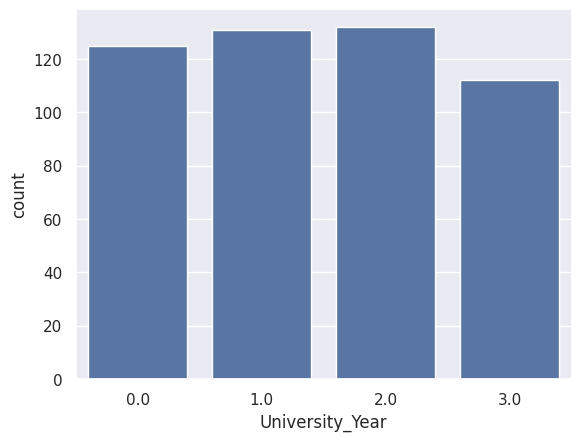

In [ ]:
sns.countplot(x=train["University_Year"]);

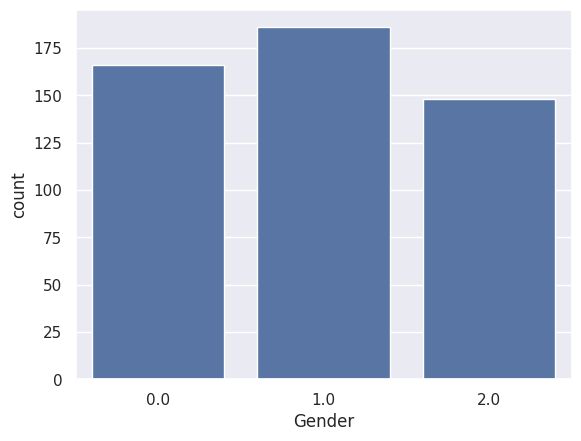

In [ ]:
sns.countplot(x=train["Gender"]);

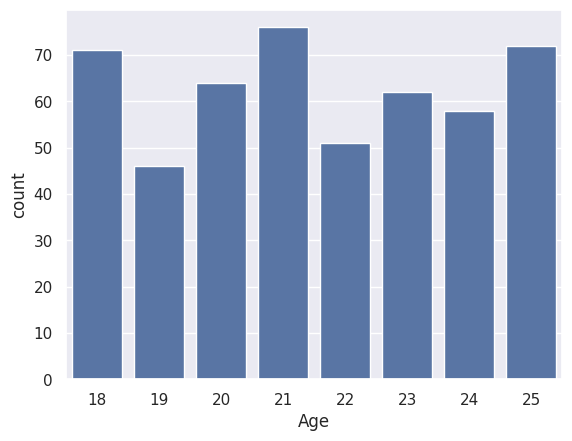

In [ ]:
sns.countplot(x=train["Age"]);

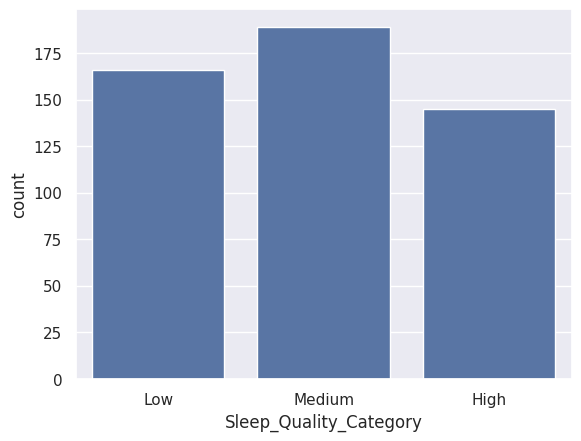

In [ ]:
sns.countplot(x=train["Sleep_Quality_Category"]);

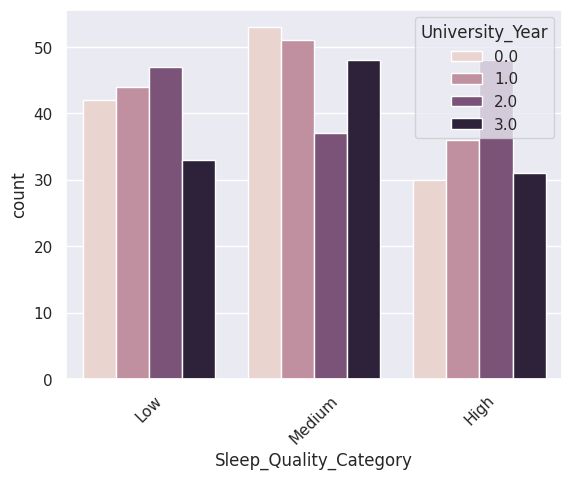

In [ ]:
plt.xticks(rotation=45)
sns.countplot(data=train, hue='University_Year', x='Sleep_Quality_Category');

In [ ]:
train.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Sleep_Quality_Category,Weekday_Sleep_Duration,Weekend_Sleep_Duration
0,1,24,2.0,1.0,7.7,7.9,3.4,2,0.308333,10,High,17.25,3.01
1,2,21,1.0,0.0,6.3,6.0,1.9,5,0.616667,2,Low,23.48,3.11
2,3,22,1.0,3.0,5.1,6.7,3.9,5,0.441667,5,Medium,10.88,14.45
3,4,24,2.0,3.0,6.3,8.6,2.8,4,0.458333,9,High,10.87,5.34
4,5,20,1.0,3.0,4.7,2.7,2.7,0,0.708333,3,Low,12.00,2.89


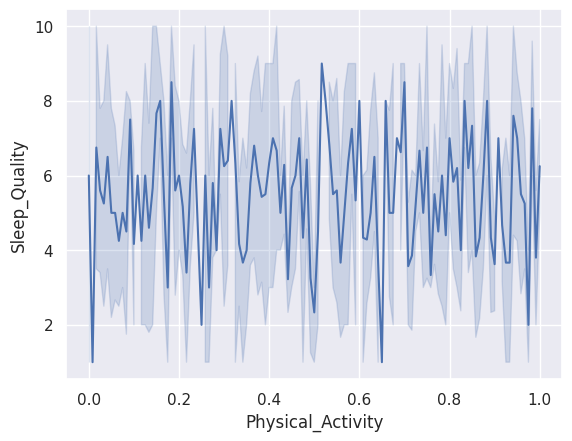

In [ ]:

sns.lineplot(data=train, x='Physical_Activity', y='Sleep_Quality');

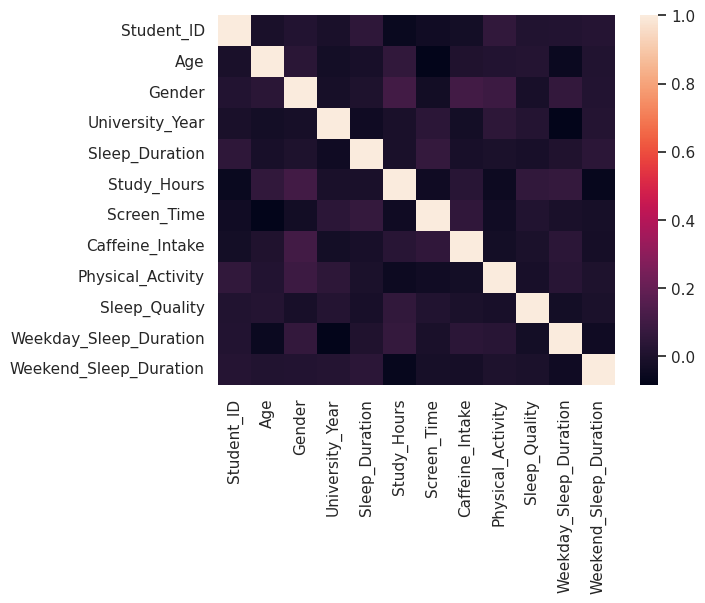

In [ ]:
sns.heatmap(train.corr(numeric_only = True));

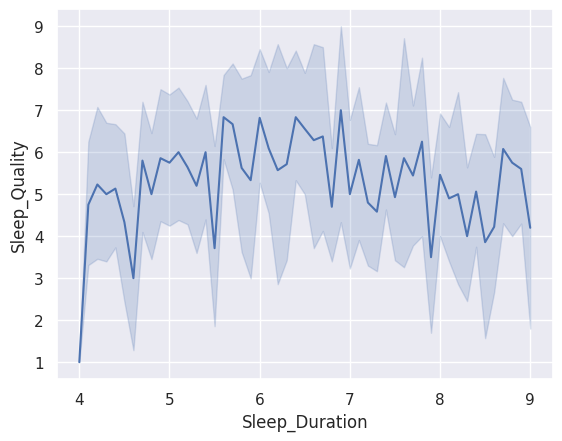

In [ ]:
sns.lineplot(data=train, x='Sleep_Duration', y='Sleep_Quality');

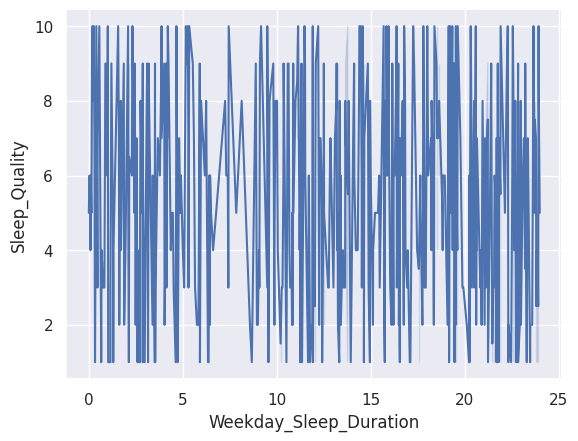

In [ ]:
sns.lineplot(data=train, x='Weekday_Sleep_Duration', y='Sleep_Quality');

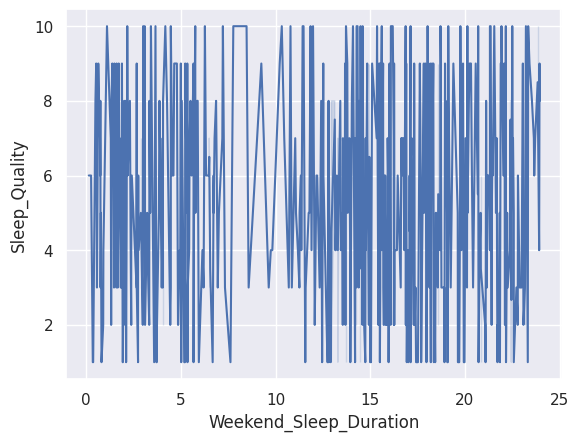

In [ ]:
sns.lineplot(data=train, x='Weekend_Sleep_Duration', y='Sleep_Quality');

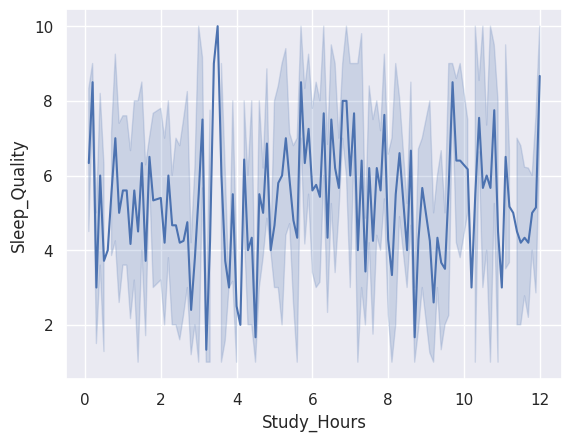

In [ ]:
sns.lineplot(data=train, x='Study_Hours', y='Sleep_Quality');

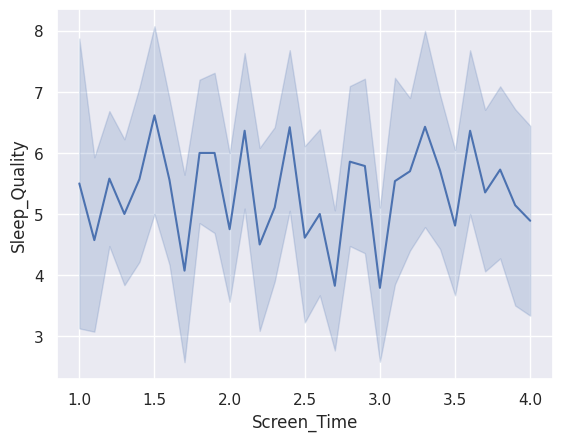

In [ ]:
sns.lineplot(data=train, x='Screen_Time', y='Sleep_Quality');

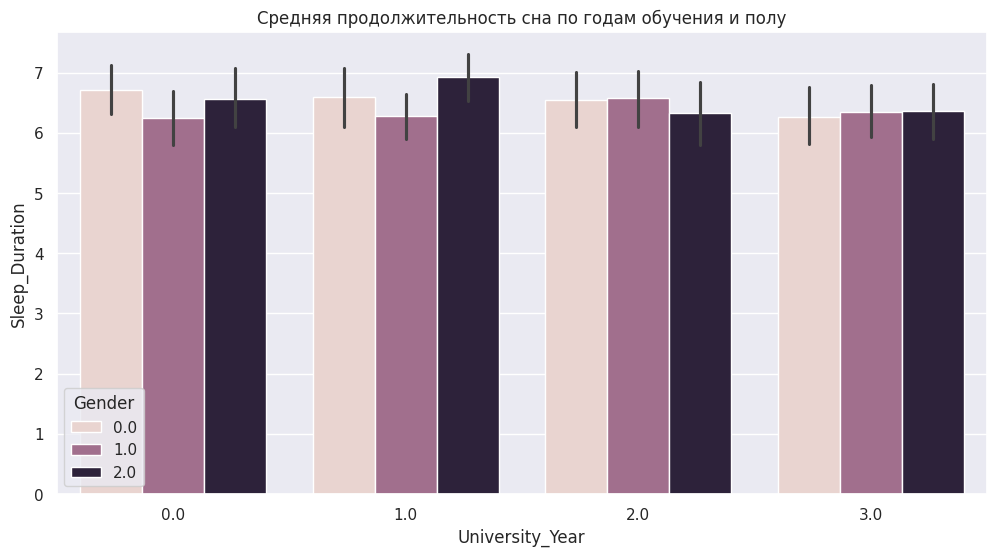

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=train, x='University_Year', y='Sleep_Duration', hue='Gender')
plt.title('Средняя продолжительность сна по годам обучения и полу')
plt.show()

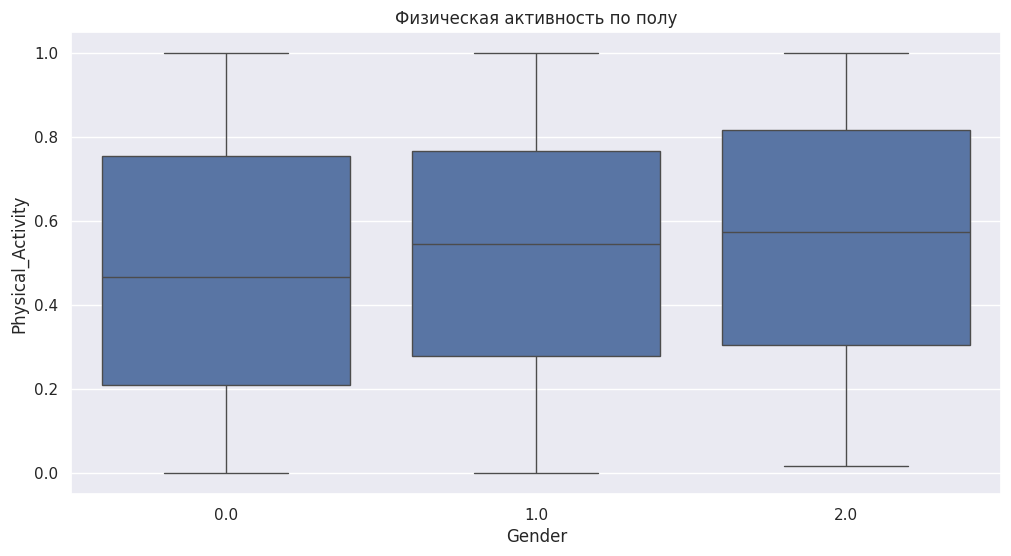

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='Gender', y='Physical_Activity')
plt.title('Физическая активность по полу')
plt.show()

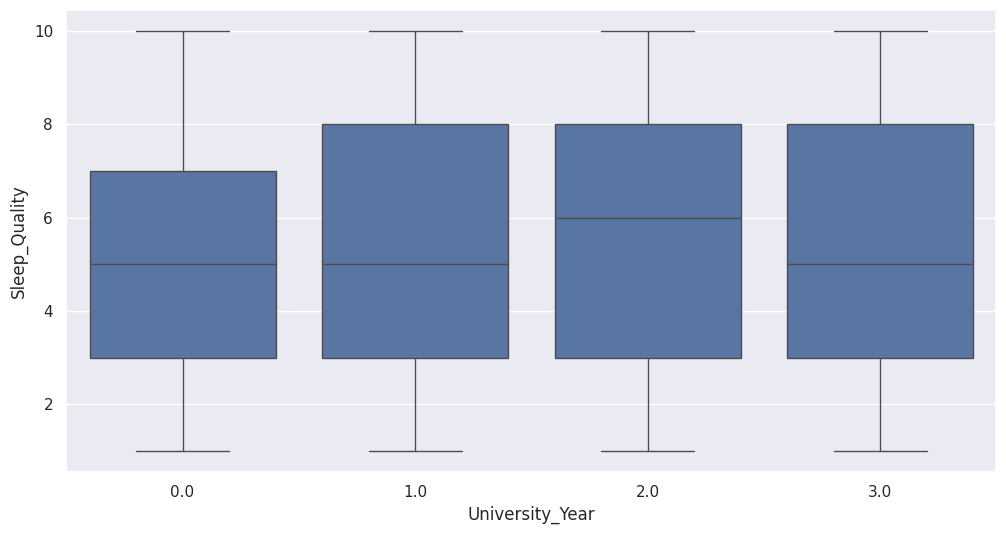

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='University_Year', y='Sleep_Quality')
plt.show()

In [ ]:
dataset=train.drop(columns=['Sleep_Quality'],axis=1)

In [ ]:
dataset.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality_Category,Weekday_Sleep_Duration,Weekend_Sleep_Duration
0,1,24,2.0,1.0,7.7,7.9,3.4,2,0.308333,High,17.25,3.01
1,2,21,1.0,0.0,6.3,6.0,1.9,5,0.616667,Low,23.48,3.11
2,3,22,1.0,3.0,5.1,6.7,3.9,5,0.441667,Medium,10.88,14.45
3,4,24,2.0,3.0,6.3,8.6,2.8,4,0.458333,High,10.87,5.34
4,5,20,1.0,3.0,4.7,2.7,2.7,0,0.708333,Low,12.00,2.89


In [ ]:
dataset['Sleep_Quality_Category'].unique()

['High', 'Low', 'Medium']
Categories (3, object): ['Low' < 'Medium' < 'High']

In [ ]:
dataset['Sleep_Quality_Category'].value_counts()

,count
Sleep_Quality_Category,
Medium,189
Low,166
High,145


In [ ]:
X = dataset.drop(['Sleep_Quality_Category'], axis=1)
y = dataset['Sleep_Quality_Category']
print(f'X shape: {X.shape} | y shape: {y.shape} ')


X shape: (500, 11) | y shape: (500,) 


In [ ]:
import scipy.stats as stats

y_mapped = y.map({'Low': 0, 'Medium': 1, 'High': 2})

# почему важно перемешивать и делать train и test статистически не различимыми по целевой переменной
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.20, random_state=15, stratify=y_mapped)

stats.ttest_ind (a=y_train, b=y_test)
X_test

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Weekday_Sleep_Duration,Weekend_Sleep_Duration
118,119,25,2.0,2.0,4.7,8.3,2.3,4,0.616667,11.66,19.70
87,88,18,2.0,2.0,6.2,11.2,3.2,0,0.483333,2.84,19.05
479,480,21,0.0,2.0,8.0,2.2,2.9,0,0.050000,3.83,3.34
338,339,21,2.0,1.0,8.2,2.5,2.9,2,0.991667,23.80,13.15
288,289,18,1.0,2.0,4.5,11.9,2.3,4,0.875000,18.60,0.14
...,...,...,...,...,...,...,...,...,...,...,...
251,252,18,2.0,0.0,8.7,6.6,3.3,3,0.816667,7.44,14.28
495,496,24,1.0,1.0,5.1,9.3,1.9,4,0.916667,13.51,2.35
104,105,19,0.0,2.0,8.9,5.9,2.7,2,0.466667,2.42,13.66
145,146,24,1.0,3.0,5.1,4.8,2.6,2,0.066667,0.97,4.55


In [ ]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=5000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  # print(cv_results)
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.340000 (0.063443)
LDA: 0.347500 (0.067500)
KNN: 0.327500 (0.045346)
CART: 0.307500 (0.062300)
NB: 0.320000 (0.054544)
SVC: 0.382500 (0.016008)


In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))
print("Точность:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.39      0.33        33
           1       0.35      0.50      0.41        38
           2       0.00      0.00      0.00        29

    accuracy                           0.32       100
   macro avg       0.21      0.30      0.25       100
weighted avg       0.23      0.32      0.27       100

Точность: 0.32


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
dataset.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality_Category,Weekday_Sleep_Duration,Weekend_Sleep_Duration
0,1,24,2.0,1.0,7.7,7.9,3.4,2,0.308333,High,17.25,3.01
1,2,21,1.0,0.0,6.3,6.0,1.9,5,0.616667,Low,23.48,3.11
2,3,22,1.0,3.0,5.1,6.7,3.9,5,0.441667,Medium,10.88,14.45
3,4,24,2.0,3.0,6.3,8.6,2.8,4,0.458333,High,10.87,5.34
4,5,20,1.0,3.0,4.7,2.7,2.7,0,0.708333,Low,12.00,2.89


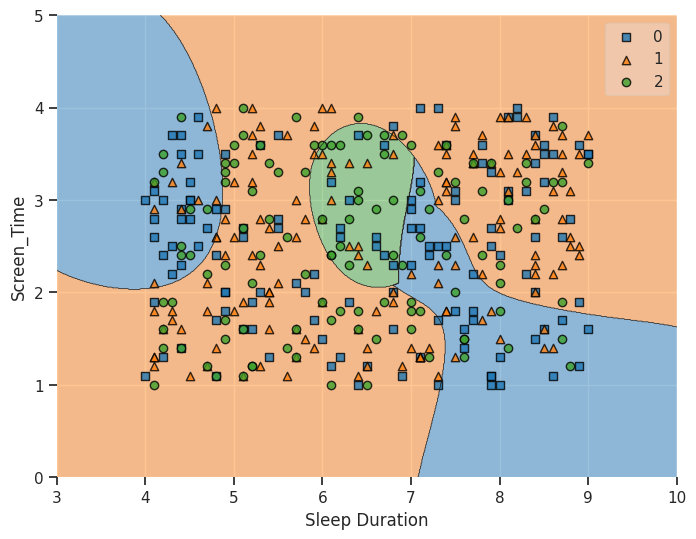

In [ ]:
from mlxtend.plotting import plot_decision_regions


y_2d = y_train.astype(int).values

X_2d = X_train[['Sleep_Duration', 'Screen_Time']].values

svc = SVC( gamma='auto')
svc.fit(X_2d, y_2d)

plt.figure(figsize=(8, 6))
plot_decision_regions(X=X_2d, y=y_2d, clf=svc)
plt.xlabel('Sleep Duration')
plt.ylabel('Screen_Time')
plt.show()



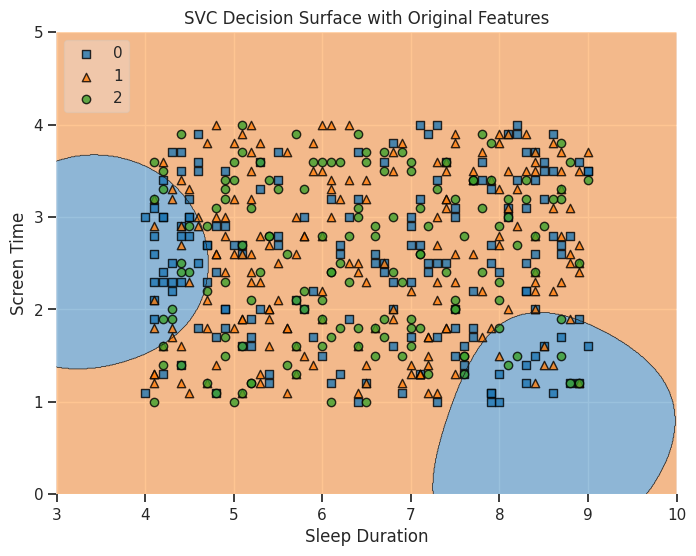

In [ ]:
# Преобразуем целевой вектор y к числовому формату (если еще не сделано)
ys = dataset['Sleep_Quality_Category'].map({'Low': 0, 'Medium': 1, 'High': 2}).astype(int).values

# Выбираем признаки Sleep_Duration и Screen_Time
Xs = dataset[['Sleep_Duration', 'Screen_Time']].values

# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, random_state=0)

# Обучение модели SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

# Построение разделяющей поверхности
plt.figure(figsize=(8, 6))
plt.title('SVC Decision Surface with Original Features')
plot_decision_regions(X=Xs, y=ys, clf=svc, legend=2)
plt.xlabel('Sleep Duration')
plt.ylabel('Screen Time')
plt.show()

In [ ]:
from sklearn import metrics
# Предсказания на тестовом наборе данных
predicted = svc.predict(X_test)

# Точность классификации
accuracy = metrics.accuracy_score(y_test, predicted)
print(f"Accuracy: {round(accuracy, 2)}")

# Precision и Recall
recall = metrics.recall_score(y_test, predicted, average="weighted")
precision = metrics.precision_score(y_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall, 2))
print("Precision (confidence when predicting a 1):", round(precision, 2))

# Подробный отчет о метриках
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy: 0.37
Recall (all 1s predicted right): 0.37
Precision (confidence when predicting a 1): 0.27
Detail:
              precision    recall  f1-score   support

           0       0.39      0.20      0.26        45
           1       0.36      0.84      0.51        44
           2       0.00      0.00      0.00        36

    accuracy                           0.37       125
   macro avg       0.25      0.35      0.26       125
weighted avg       0.27      0.37      0.27       125



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m